# Q-Reply @ Qhack 2021
# A quantum variational approach to data classification and the potential for Quantum Advantage

In the latest years more and more attention has been drawn to the application of Quantum Computing to Machine Learning. Classical computers are often able to provide high quality solutions, thus enabling businesses to benefit from data-driven and automated approaches. However, if even better results were at hand the profits would be higher and in some situations classical Machine Learning may not be able to provide sufficiently good results at all. For these reasons, the search for higher quality solutions is endless. 

In this framework, Quantum Computing sets itself as a major potential game-changer, opening up a number of possibilities to obtain improved performances when compared to existing classical techniques. This new field, called Quantum Machine Learning, is still in its infancy: Quantum Computers are currently undergoing major engineering improvements and it is not yet clear how and when Machine Learning could benefit from Quantum Computing in practice. 

In this work we extensively explore the well-known (in the Quantum Computing Community!) variational approach for data classification. We analyse two datasets and investigate the impact of different strategies, namely the ansatz and the depth of the Quantum Circuit, with the following goal: 

* Test empirically if the Quantum Computing strategy is able to perform better than classical techniques – Quantum Advantage  

A local simulator has been used to run most of the experiments and Rigetti’s ASPEN 9 was employed via AWS Braket for some small tests. 

## Data used in this project

We develop a variational approach on two different datasets:  

* Rice dataset 
* Heart-failure dataset 

The first one is composed by 7 features, all real-valued, describing the rice collected for the dataset and the class attribute, which is binary and indicates the species of the rice: Cammeo or Osmancik. The dataset is composed by 3810 instances, 3048 of which have been used as training set and 762 as test set for our experiments. 

The second one is composed by 12 features, 9 integer valued and 3 real-valued, collecting characteristics of patients collected for the study on heart failure. The class attribute is binary and indicates whether the patient deceased. The dataset is composed by 299 instances. After preprocessing and data filtering, 136 datapoints have been used as training set and 92 as test set for our experiments.  

### Data sources 

Rice dataset, taken from:<br>
https://www.muratkoklu.com/datasets/<br>
CINAR, I. and KOKLU, M., (2019). “Classification of Rice Varieties Using Artificial Intelligence Methods.” International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194.<br>
(https://doi.org/10.18201/ijisae.2019355381)

Heart-failure dataset, taken from:<br>
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data<br>
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). <br>
(https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)<br>

## Approach

The following remarks are valid for experiments done on both datasets: 

1. In order to clearly inspect the impact of the different ansatz investigated in this work and for the sake of computational feasibility in limited amount of time, we pre-processed the dataset’s attributes and performed a Principal Component Analysis to obtain the first 2 principal components. 

1. The classical algorithms experimented in this work are Support Vector Machines (SVM) and Random Forests. The reason for these choices is that our interest was to compare the performances of the variational approach both with a somewhat simple technique and a more complex one that is notoriously often a good performer 

1. The circuits we investigated comprised a number of layers from 1 to 5; BasicEntanglerLayer and StronglyEntanglingLayer as variational circuits; BasicEntanglerLayer and AngleEmbedding as feature maps to encode features in quantum states 

1. We report details of the best results found in the investigation 

# Results on heart-failure dataset

One rationale behind the choice of this dataset was driven by the convenient availability of benchmarks with classical strategies developed by other scientists and publicly available: from a quick scan it was possible to notice that classical algorithms could reach a fairly high classification accuracy (more than 90%), even though not extremely high. 

Given the imbalance of this dataset, the loss function was rescaled to weigh the two classes differently (an error on the minority class is more important). 

## Classical methods 

We start with some classical algorithms (without spending too much time on hyperparameter tuning) to set some baseline scores for the quantum circuit.

| Support vector machines | Random forest classifier |
| :---: | :---: |
| 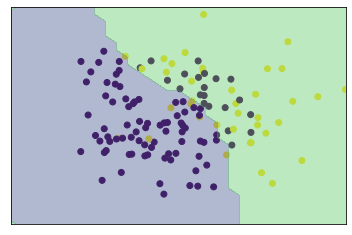<br>Decision boundaries learned by SVM (superimposed on the training data) | 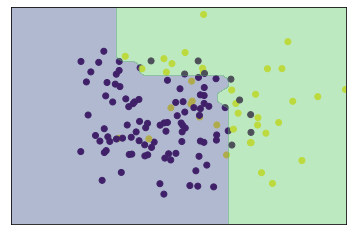<br>Decision boundaries learned by Random Forest (superimposed on the training data) | 
| 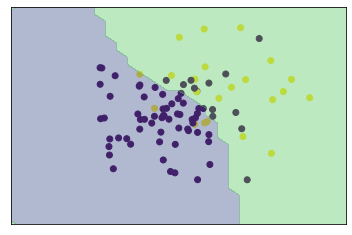<br>Decision boundaries learned by SVM (superimposed on the test data) | 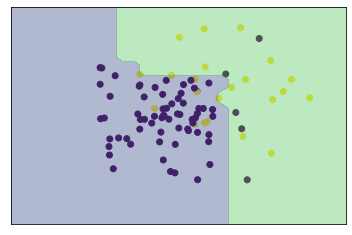<br>Decision boundaries learned by Random Forest (superimposed on the test data) | 
| Accuracy on test set: 78% | Accuracy on test set: 86% |
| Macro-averaged f1 score on test set\* : 0.74 | Macro-averaged f1 score on test set: 0.79 |

\*Since the dataset is imbalanced, the macro-averaged f1 score is shown in addition to the accuracy.

## Quantum variational circuits

After some experiments, we settled on the following quantum circuit. 

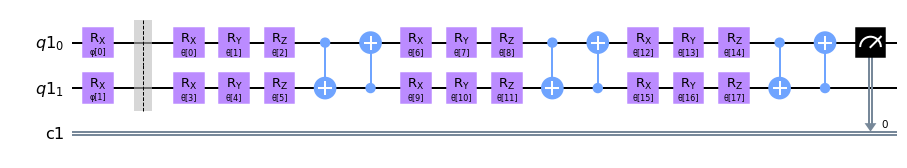

Features are encoded as single qubit rotations, and several strongly entangling layers (3 layers in the picture above) are used as variational layers. Training and classification use the additional steps listed below:

* The expectation value of PauliZ is measured on the first qubit
* The measurement value is rescaled to the range \[0, 1\] to match the labels
* During training, the square loss function is used to compare the rescaled output to the labels
* During classification, label 1 is assigned if the rescaled expectation value is bigger than 0.5. Label 0 is assigned otherwise.

### Simulated circuits

We collect some of the results obtained by changing the number of variational layers and the scale of the features.

| 3 variational layers | 4 variational layers | 5 variational layers | 4 variational layers, features scaled by a factor 2 |
| :---: | :---: | :---: | :---: |
| 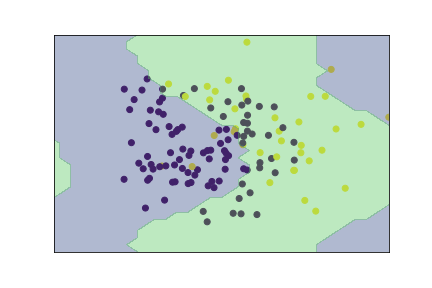<br>Decision boundaries (superimposed on the training data) | 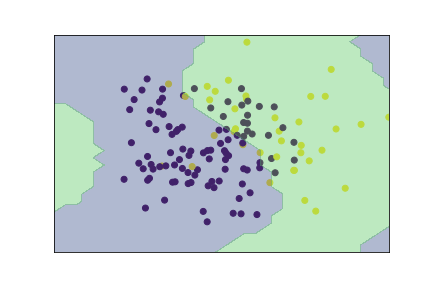<br>Decision boundaries (superimposed on the training data) | 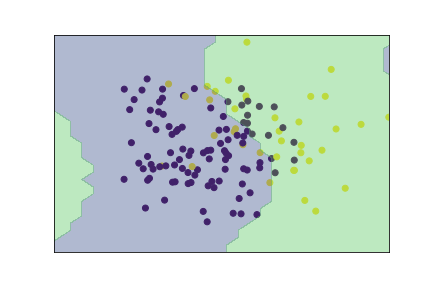<br>Decision boundaries (superimposed on the training data) | 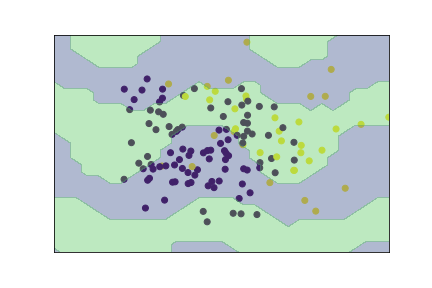<br>Decision boundaries (superimposed on the training data) |
| 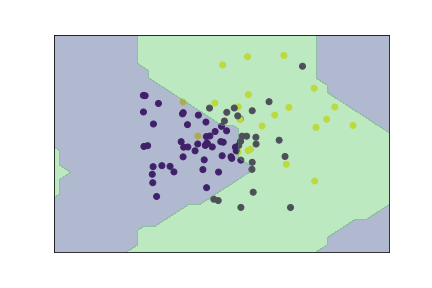<br>Decision boundaries (superimposed on the test data) | 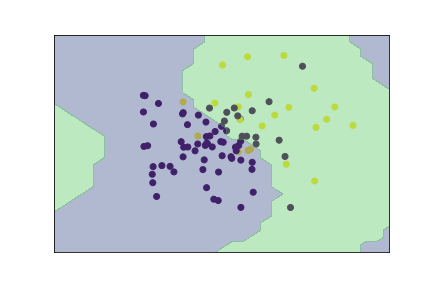<br>Decision boundaries (superimposed on the test data) | 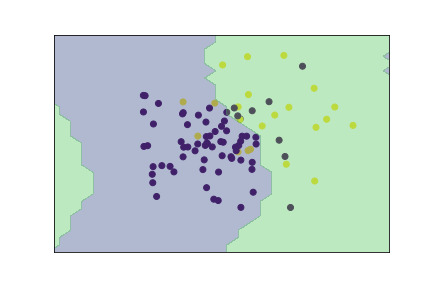<br>Decision boundaries (superimposed on the test data) | 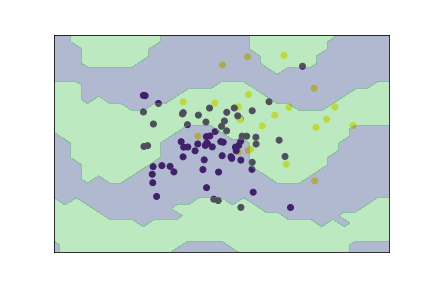<br>Decision boundaries (superimposed on the test data) |
| Accuracy on test set: 74% | Accuracy on test set: 77% | Accuracy on test set: 84% | Accuracy on test set: 64% |
| Macro-averaged f1 score on test set: 0.71 | Macro-averaged f1 score on test set: 0.77 | Macro-averaged f1 score on test set: 0.79 | Macro-averaged f1 score on test set: 0.61 |

# Results on rice dataset

## Classical methods 

We start with some classical algorithms (without spending too much time on hyperparameter tuning) to set some baseline scores for the quantum circuit.

| Support vector machines | Random forest classifier |
| :---: | :---: |
| 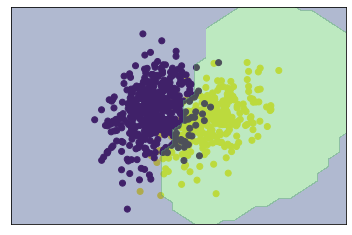<br>Decision boundaries learned by SVM (superimposed on the test data) | 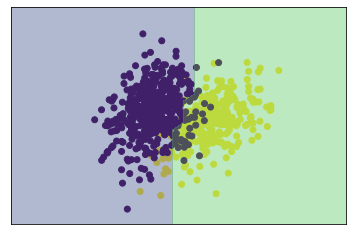<br>Decision boundaries learned by Random Forest (superimposed on the test data) | 
| Accuracy on test set: 91% | Accuracy on test set: 91% |

## Quantum variational circuits

The circuit used is similar to the one introduced in the previous section.

### Simulated results

| Decision boundaries learned by circuit. | Decision boundaries learned by same circuit with features rescaled by a factor 2. | Decision boundaries learned by same circuit with features rescaled by a factor 3. |
| :---: | :---: | :---: |
| 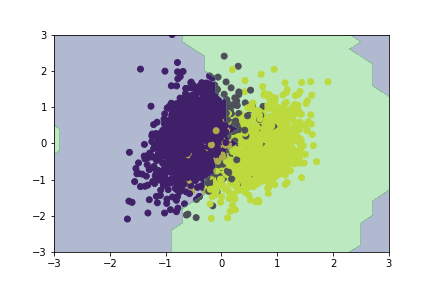 | 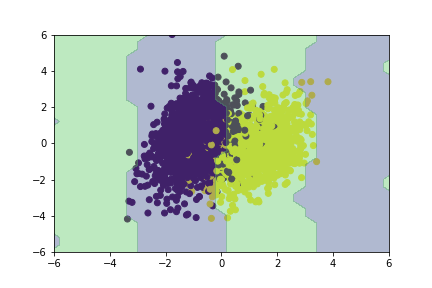 | 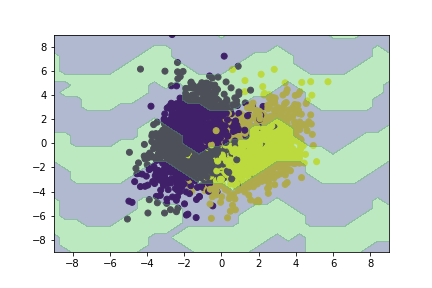 |
| In this case the periodicity of the model can accomodate well the natural scale of the dataset | In this case the periodicity of the model barely matches the natural scale of the dataset | In this case the periodicity of the model cannot match the natural scale of the dataset |
| Accuracy on test set: 89% | Accuracy on test set: 88% | Accuracy on test set: 63% |

# Observations

The following elements greatly affect the result of the circuit

## Scaling the features

The classical features are loaded into the quantum circuit as rotation angles in unitary gates. Suppose that a datapoint is described by the two features $(x, y)$. If $x$ is loaded in the circuit as angle in a single qubit rotation $U(x)$, any value $x + 2 n \pi$ (where $n$ is a natural number) will be indistinguishable from $x$. In other words $U(x) = U(x + 2 n \pi)$. Therefore the circuit learns periodic decision boundaries and one should be careful in choosing the scale of the dataset, so that the periodicity of the decision boundary can match the scale of the dataset (or any natural periodicity present in the dataset).

See the results on the rice dataset to get a visual explanation of this.

## Shape of the decision boundaries

The shape of the decision boundaries is influenced by the type of gates and the number of layers present in the circuit. Adding more layers with rotations along different axis gives more freedom to the circuit, at the cost of having more variational parameters and slowing down the training phase.

We can see this in the heart-failure dataset example. The variational circuit with 4 entangling layers can find a better shape for the boundary, compared to the circuit with 3 entangling layers.

As another example, during our initial experiments we tried to use basic entangling layers as variational part but the circuit was struggling to learn boundary decisions with the correct shape for the datasets.

# Run on quantum hardware

Running the circuit on the quantum hardware would have provided a comparison between the simulated accuracy and the real accuracy given by the QPU.
Due to the number of entangling layers in the variational circuit used in the local simulations, training the same variational classifier on a QPU would require a high number of task. This was not feasible due to limited resources.